In [90]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.stats import norm 
from scipy import stats
from scipy.stats import cauchy
import statsmodels.api as model

# Exercise 4.19

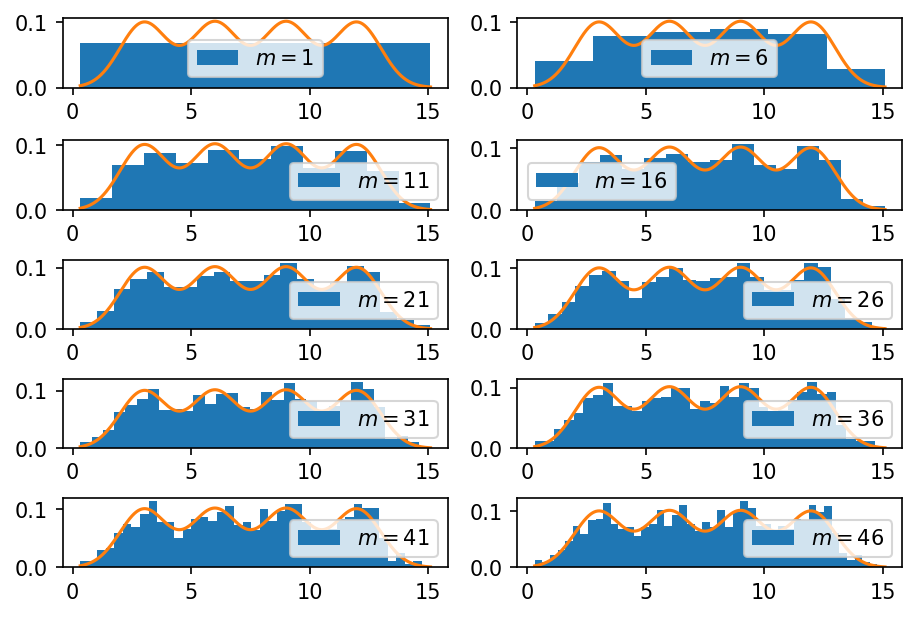

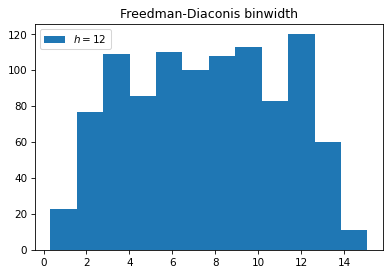

In [51]:
def prob19():
  
  def draw(n=1000):
    ''' Draw from distribution defined by f n times
        Parameters: 
            n (int): number of draws to make, default value, n
        Returns:
            draw ((n,) np.ndarray): the draw from the distribution
    '''
    k_vals = np.random.randint(low=1, high=5, size=n)
    z_vals = np.random.normal(loc=0, scale=1, size=n)

    return z_vals + 3*k_vals

  def pdf(x):
    ''' this is the pdf of our function
    '''
    return np.sum([norm.pdf(x-3*k) for k in range(1, 5)], axis=0)/4

  #get the draw
  draw = draw()
  #get min and max values for my domain and the m values
  a, b = np.min(draw), np.max(draw)
  domain = np.linspace(a, b, 1000)
  m_vals = np.arange(1, 47, 5)
  #plot the histograms with the different bin values with the p.d.f.
  k = 0
  fig, axs = plt.subplots(5, 2,constrained_layout=True)
  fig.set_dpi(150)
  for i in range(5):
    for j in range(2):
      m = m_vals[k]
      ax = axs[i, j]
      ax.hist(draw, bins=m, density=True, label=r'$m = $' + str(m))
      ax.plot(domain, pdf(domain))
      ax.legend(loc='best')
      k +=1

  plt.show()

  #part 3
  fig = plt.figure()
  fig.set_dpi(75)
  ax = fig.add_subplot(111)
  IQR = stats.iqr(draw)
  h = 2*(IQR/(1000**(1/3)))
  m = int(np.round((b-a)/h))
  ax.hist(draw, bins=m, label=r'$h = $' + str(m))
  ax.set_title(r'Freedman-Diaconis binwidth')
  ax.legend(loc='best')
  plt.show()

  return
prob19()


# Problem 20

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


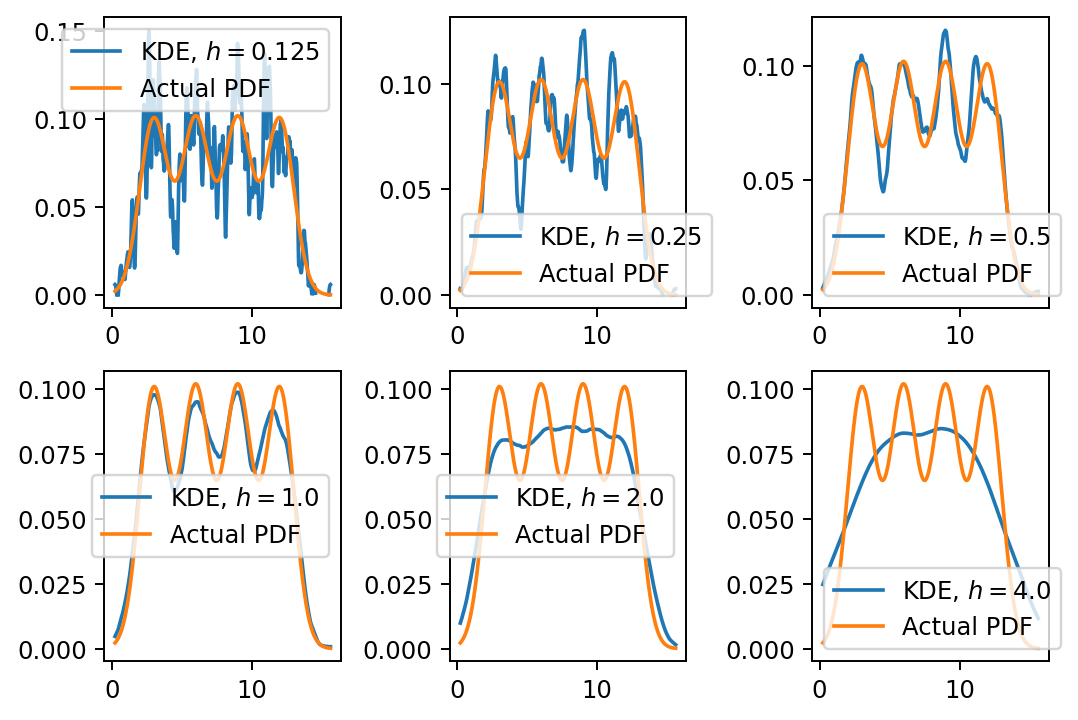

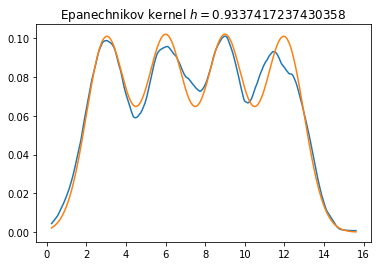

In [60]:
def prob20():

  def draw(n=1000):
    ''' Draw from distribution defined by f n times
        Parameters: 
            n (int): number of draws to make, default value, n
        Returns:
            draw ((n,) np.ndarray): the draw from the distribution
    '''
    k_vals = np.random.randint(low=1, high=5, size=n)
    z_vals = np.random.normal(loc=0, scale=1, size=n)

    return z_vals + 3*k_vals

  def pdf(x):
    ''' this is the pdf of our function
    '''
    return np.sum([norm.pdf(x-3*k) for k in range(1, 5)], axis=0)/4

  #20 part 1
  draw = draw()
  a = np.min(draw)
  b = np.max(draw) 
  domain = np.linspace(a, b, 1000)
  h_vals = np.logspace(start=-3, stop=2,base=2, num=6)

  fig, axs = plt.subplots(2, 3, constrained_layout=True)
  fig.set_dpi(175)
  k = 0
  for i in range(2):
    for j in range(3):
      h = h_vals[k]
      ax = axs[i, j]
      density = model.nonparametric.KDEUnivariate(draw)
      density.fit(kernel='epa', bw=h, fft=False)
      y = np.array([density.evaluate(val) for val in domain])

      ax.plot(domain, y, label=r'KDE, $h=$' + str(h))
      ax.plot(domain, pdf(domain), label='Actual PDF')
      ax.legend(loc='best')
      k+=1

  plt.show()

  #20 part 2
  m = int(np.round((b-a)/h))
  sigma = np.var(draw)
  h = 1.059*np.sqrt(sigma)*1000**(-1/5)

  density = model.nonparametric.KDEUnivariate(draw)
  density.fit(kernel='epa', bw=h, fft=False)

  y = np.array([density.evaluate(val) for val in domain])

  plt.plot(domain, y)
  plt.title('Epanechnikov kernel $h = $' + str(h))
  plt.plot(domain, pdf(domain))
  plt.show()

prob20()

# Exercise 21

We show that $\mathbb{E}[\hat{F}_n(y)] = F_X(y)$.
    Remember that 
    \begin{align*}
        \mathbb{1}_{[x_i, \infty)}(y) &= 
        \begin{cases}
            1 & \text{if} y \geq 0 \\
            0 & \text{otherwise}
        \end{cases}\\
        &= \mathbb{1}_{(\infty, y]}(x_i)
    \end{align*}
    This gives us 
    \begin{align*}
        \mathbb{E}[\hat{F}_n(y)] &=\mathbb{E}\left[\frac{1}{n}\sum_{i=1}^n \mathbb{1}_{[x_i, \infty)}(y)\right] = \frac{1}{n}\sum_{i=1}^n \mathbb{E}[\mathbb{1}_{[x_i, \infty)}(y)]\\
        &= \frac{1}{n}\sum_{i=1}^n \mathbb{E}[\mathbb{1}_{[-\infty, y)}(x_i)] = \frac{1}{n}\sum_{i=1}^n F_X(y) = F_x(y)
    \end{align*}
    Notice because $\mathbb{E}[\hat{F}_n(y)] = F_X(y)$ we have that
     $\operatorname{bias}{\hat{F}_n(y)} = 0$.  Therefore $\operatorname{MSE}\left(\hat{F}_n(y)\right) = \operatorname{Var}\left({\hat{F}_n(y)}\right)$ A desired. 
    Now we find the variance of our estimator. 
    Recall the rule that $\operatorname{Var}(X) = \mathbb{E}[X^2] - \mathbb{E}[X]^2 = \mathbb{E}[\hat{F}_n(y)^2] - F_X(y)^2$. 
    \begin{align*}
        \mathbb{E}[\hat{F}_n(y)^2] &= \mathbb{E}\left[\left(\frac{1}{n}\sum_{i=1}^n \mathbb{1}_{[x_i, \infty)}(y)\right)\left(\frac{1}{n}\sum_{j=1}^n \mathbb{1}_{[x_j, \infty)}(y)\right)\right]\\
        &=\frac{1}{n^2}\left(\sum_{i=1}^n \mathbb{E}\left[\mathbb{1}_{(-\infty, y]}(x_i)^2\right] + \sum_{i\neq j} \mathbb{E}\left[\mathbb{1}_{(\infty, y]}(x_i)\mathbb{1}_{(-\infty, y]}(x_i)\right]\right)\\
        &= \frac{1}{n^2}\left(nF_X(y) + \sum_{i=1}\sum_{i\neq j} \mathbb{E}\left[\mathbb{1}_{(\infty, y]}(x_i)\right]\mathbb{E}\left[\mathbb{1}_{(\infty, y]}(x_i)\right]\right) \\
        &= \frac{1}{n^2}\left(nF_X(y) + n(n-1) F_X(y)^2\right)\\
        &= \frac{1}{n}\left(F_X(y) + (n-1)F_X(y)^2\right)
    \end{align*}
    Which gives $\operatorname{Var}(\hat{F}_n(y)) =  \frac{F_X(y) (1- F_X(y))}{n}$ as desired.

       
   

In [91]:
def prob22(n=300):
  #part 1 of problem 22
  #alpha value
  alpha = 0.05
  #bound
  ep = np.sqrt((1/(2*n))*np.log(2/alpha))
  #computes the empircal distribution given a draw, and a value y
  def empirical_distribution(draw, y):
    sum = 0
    n = draw.size
    for x_val in draw:
      if x_val <= y:
        sum += 1

    return sum/n
  #domain to check
  domain = np.linspace(-20, 20, 300)
  #our draw
  draw = np.random.normal(loc=0, scale=1, size=n)
  #get lower and upper 
  L = np.array([max(empirical_distribution(draw, val) - ep, 0) for val in domain])
  U = np.array([min(empirical_distribution(draw, val) + ep, 1) for val in domain])
  #check if we ever left
  less_than = np.where(norm.cdf(domain) < L)
  greater_than = np.where(norm.cdf(domain) > U)
  #print if we ever left
  if np.sum(less_than) == 0 and np.sum(greater_than) == 0:
    print('CDF stayed within the bound!')
  else: 
    print('CDF left the bound!')  

  #this is part 2 of problem 22
  total_left = 0
  for _ in range(100):
    draw = np.random.normal(loc=0, scale=1, size=n)

    L = np.array([max(empirical_distribution(draw, val) - ep, 0) for val in domain])
    U = np.array([min(empirical_distribution(draw, val) + ep, 1) for val in domain])

    less_than = np.where(norm.cdf(domain) < L)
    greater_than  = np.where(norm.cdf(domain) > U)

    if np.sum(less_than) != 0 or np.sum(greater_than) != 0:
      total_left += 1
      
  print(str(total_left) + "% of the time we will leave the confidence interval for normal.")

  #part 3 of problem 22
  total_left = 0
  for _ in range(100):
    draw = np.random.standard_cauchy(n)

    L = np.array([max(empirical_distribution(draw, val) - ep, 0) for val in domain])
    U = np.array([min(empirical_distribution(draw, val) + ep, 1) for val in domain])

    less_than = np.where(cauchy.cdf(domain) < L)
    greater_than = np.where(cauchy.cdf(domain) > U)
    if np.sum(less_than) != 0 or np.sum(greater_than) != 0:
      total_left +=1

  print(str(total_left) + "% of the time we will leave the confidnce interval for cauchy.")

  return


prob22()

CDF stayed within the bound!
3% of the time we will leave the confidence interval for normal.
2% of the time we will leave the confidnce interval for cauchy.


# Exercise 4.23
Let $(X_i)_{i=1}^n$ be a sample mean from a distribution $F$ with support in $\mathbb{R}$ and with finite mean and variance. 
We find the distribution $F_n(y)$. 
\begin{align*}
    S_n = \mathbb{1}_{[x_1, \infty)}(y) + \cdots + \mathbb{1}_{[x_n, \infty)}(y) = n \hat{F}_n(y)
\end{align*}
and $\operatorname{Var}(\mathbb{1}_{[x_i, \infty)}(y)) = F_X(y)(1 - F_X(y))$ by the last exercise.
Also note that $\mathbb{E}[\mathbb{1}_{[x_i, \infty)}(y) = F_X(y)$ and note that $F_x(y)\xrightarrow[]{p}F_X(y)$
then 
\begin{align*}
    Y_n = \frac{S_n - F_X(y)}{\sqrt{n}F_x(y)(1 - F_x(y))/n}
\end{align*}
By the central limit theorem we have that $Y_n$ is normally distributed. 
Therefore $\hat{F}_n(y)$ is normally distributed. 

# Exercise 4.24
Let $(X_i)_{i=1}^n$ be a sample from a distribution with p.d.f. equal to $f_X(x)$.
Let $\hat{f}_n$ be the kernel density estimator with rectangular kernel with the rectangular kernel $K(x) = \frac{-1}{2}\mathbb{1}_{[-1, 1]}(x)$. 
    \begin{align*}
        \mathbb{E}[\hat{f}_n(x)] &= \mathbb{E}\left[\frac{1}{n}\sum_{i=1}^n \frac{1}{h}K\left(\frac{x-X_i}{h}\right)\right] = \frac{1}{n}\sum_{i=1}^n \mathbb{E}\left[\frac{1}{h}\frac{1}{2}\mathbb{1}_{[-1, 1]} \left(\frac{x-X_i}{h}\right)\right]\\
        &= \frac{1}{2nh}\sum_{i=1}^n P(X -h\leq x_i, \leq X + h) = \frac{1}{2h}\int_{x-h}^{x + h}f_X(t) dt
    \end{align*}
    Using the same rele as before we need to find $\mathbb{E}[\hat{f}_n(x)^2]$ and $\mathbb{E}[\hat{f}_n(x)]^2$
    \begin{align*}
        \mathbb{E}[\hat{f}_n(x)^2] &= \mathbb{E}\left[\left(\frac{1}{n}\sum_{i=1}^n \frac{1}{h}K\left(\frac{x-X_i}{h}\right)\right)\left(\frac{1}{n}\sum_{j=1}^n \frac{1}{h}K\left(\frac{x-X_j}{h}\right)\right)\right]\\
        &= \frac{1}{4n^2h^2}\mathbb{E}\left[\left(\sum_{i=1}^n\mathbb{1}_{[-1, 1]}\left(\frac{x-X_i}{h}\right)\right)\left(\sum_{j=1}^n \mathbb{1}_{[-1, 1]}\left(\frac{x-X_j}{h}\right)\right)\right]\\
        &= \frac{1}{4n^2h^2}\mathbb{E}\left[\sum_{i=1}^n \mathbb{1}_{[-1, 1]}\left(\frac{x-X_i}{h}\right)^2 +\sum_{i}\sum{i\neq j}\mathbb{1}_{[-1, 1]}\left(\frac{x-X_i}{h}\right)\mathbb{1}_{[-1, 1]}\left(\frac{x-X_j}{h}\right)\right]\\
        &= \frac{1}{4n^2h^2}\left(n\mathbb{E}\left[ \mathbb{1}_{[-1,1]}\left(\frac{x-X}{h}\right)\right] + n(n-1)\mathbb{E}\left[\mathbb{1}_{[-1,1]}\left(\frac{x-X}{h}\right)\right]\mathbb{E}\left[\mathbb{1}_{[-1,1]}\left(\frac{x-X}{h}\right)\right]\right)\\
        &= \frac{1}{4nh^2}\int_{x-h}^{x+h} f_X(t) dt +\frac{n-1}{4nh^2}\left(\int_{x-h}^{x+h} f_X(t)dt\right)^2
    \end{align*}
    Which gives 
    \begin{align*}
        \operatorname{Var}(\hat{f}_n(x)) &= \frac{1}{4nh^2}\int_{x-h}^{x+h} f_X(t) dt +\frac{n-1}{4nh^2}\left(\int_{x-h}^{x+h} f_X(t)dt\right)^2 - \frac{1}{4h^2}\left(\int_{x-h}^{x+h} f_X(t)dt\right)^2\\
        &= \frac{1}{4nh^2}\left(\int_{x-h}^{x+h}f_X(t) dt - \left(\int_{x-h}^{x+h}f_X(t) dt\right)^2\right)
    \end{align*}